In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("striker_data.csv")

In [2]:
df.head()

,name,team,goals,minutes,position
0,Erling Haaland,Man City,20,1800,CF
1,Ollie Watkins,Aston Villa,14,1950,CF
2,Mohamed Salah,Liverpool,15,1820,RW
3,Son Heung-min,Tottenham,12,1740,LW
4,Alexander Isak,Newcastle,10,1350,CF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      50 non-null     object
 1   team      50 non-null     object
 2   goals     50 non-null     int64 
 3   minutes   50 non-null     int64 
 4   position  50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [4]:
df.describe()

,goals,minutes
count,50.000000,50.000000
mean,6.480000,1262.200000
std,3.682501,383.652106
min,2.000000,400.000000
25%,4.000000,990.000000
50%,6.000000,1240.000000
75%,8.000000,1550.000000
max,20.000000,1950.000000


In [5]:
df.columns

Index(['name', 'team', 'goals', 'minutes', 'position'], dtype='object')

In [6]:
df[df["minutes"] == 0]

,name,team,goals,minutes,position


In [7]:
df["goals_per_90"] = (df["goals"] / df["minutes"]) * 90

In [8]:
df["goals_per_90"] = df["goals_per_90"].round(2)

In [9]:
df[["name", "goals", "minutes", "goals_per_90"]].head()

,name,goals,minutes,goals_per_90
0,Erling Haaland,20,1800,1.00
1,Ollie Watkins,14,1950,0.65
2,Mohamed Salah,15,1820,0.74
3,Son Heung-min,12,1740,0.62
4,Alexander Isak,10,1350,0.67


In [10]:
df_filtered = df[(df["minutes"] >= 900) & (df["position"] == "CF")].copy()

df_filtered

,name,team,goals,minutes,position,goals_per_90
0,Erling Haaland,Man City,20,1800,CF,1.00
1,Ollie Watkins,Aston Villa,14,1950,CF,0.65
4,Alexander Isak,Newcastle,10,1350,CF,0.67
6,Dominic Solanke,Bournemouth,12,1920,CF,0.56
8,Darwin Nunez,Liverpool,7,1280,CF,0.49
9,Nicolas Jackson,Chelsea,7,1450,CF,0.43
11,Richarlison,Tottenham,9,1100,CF,0.74
13,Rasmus Hojlund,Man Utd,5,1200,CF,0.38
14,Evan Ferguson,Brighton,6,1050,CF,0.51
15,Taiwo Awoniyi,Nottingham Forest,6,980,CF,0.55


In [11]:
len(df), len(df_filtered)

(50, 23)

In [12]:
top_5_goals_per_90 = df_filtered.sort_values(
    by="goals_per_90",
    ascending=False
)

top_5_goals_per_90[["name", "goals_per_90", "minutes"]].head(10)

,name,goals_per_90,minutes
0,Erling Haaland,1.00,1800
35,Diogo Jota,0.85,950
11,Richarlison,0.74,1100
4,Alexander Isak,0.67,1350
1,Ollie Watkins,0.65,1950
17,Chris Wood,0.63,1150
21,Elijah Adebayo,0.62,1300
6,Dominic Solanke,0.56,1920
15,Taiwo Awoniyi,0.55,980
14,Evan Ferguson,0.51,1050


In [13]:
shortlist = top_5_goals_per_90.head(5).copy()
shortlist["goals_per_90_rank"] = range(1, len(shortlist) + 1)

shortlist

,name,team,goals,minutes,position,goals_per_90,goals_per_90_rank
0,Erling Haaland,Man City,20,1800,CF,1.00,1
35,Diogo Jota,Liverpool,9,950,CF,0.85,2
11,Richarlison,Tottenham,9,1100,CF,0.74,3
4,Alexander Isak,Newcastle,10,1350,CF,0.67,4
1,Ollie Watkins,Aston Villa,14,1950,CF,0.65,5


## Player: Erling Haaland

- Club: Manchester City
- Minutes Played: 1800
- Goals: 20
- Goals per 90: 1.00

### Data Insight
Haaland memiliki goals/90 tertinggi di antara striker dengan menit bermain ≥ 900. Hal ini menunjukkan efisiensi mencetak gol yang sangat tinggi dan konsisten pada volume menit yang besar.

### Scouting Conclusion
Pemain ini cocok untuk sistem yang membutuhkan target man dengan penyelesaian akhir cepat di kotak penalti.


In [14]:
top_1 = df_filtered.iloc[0]
avg_g90 = df_filtered['goals_per_90'].mean()

print(f"Insight Utama: {top_1['name']} adalah striker paling efisien dengan {top_1['goals_per_90']:.2f} gol setiap 90 menit.")
print(f"Ini jauh di atas rata-rata filter kita yang sebesar {avg_g90:.2f} G/90.")

Insight Utama: Erling Haaland adalah striker paling efisien dengan 1.00 gol setiap 90 menit.
Ini jauh di atas rata-rata filter kita yang sebesar 0.50 G/90.


In [15]:
top_2 = top_5_goals_per_90.iloc[1]

print(f"Striker hidden gem: {top_2['name']} pemain ini mendapat peringkat G/90 terbaik kedua dengan nilai {top_2['goals_per_90']:.2f}. Mencatatkan torehan gol {top_2['goals']} dengan menit bermain yang hanya {top_2['minutes']} minutes.")
print(f"Dari total gol yang telah dihasilkan dan dari total menit bermainnya, bisa disimpulkan bahwa pemain ini cukup bagus dalam urusan mencetak gol, dia adalah pemain supersub yang produktif, jika direkrut oleh tim yang sedang membutuhkan seorang striker, maka pemain ini adalah striker yang highly recommended untuk direkrut karena kemampuannya dalam mencetak gol tinggi.")

Striker hidden gem: Diogo Jota pemain ini mendapat peringkat G/90 terbaik kedua dengan nilai 0.85. Mencatatkan torehan gol 9 dengan menit bermain yang hanya 950 minutes.
Dari total gol yang telah dihasilkan dan dari total menit bermainnya, bisa disimpulkan bahwa pemain ini cukup bagus dalam urusan mencetak gol, dia adalah pemain supersub yang produktif, jika direkrut oleh tim yang sedang membutuhkan seorang striker, maka pemain ini adalah striker yang highly recommended untuk direkrut karena kemampuannya dalam mencetak gol tinggi.


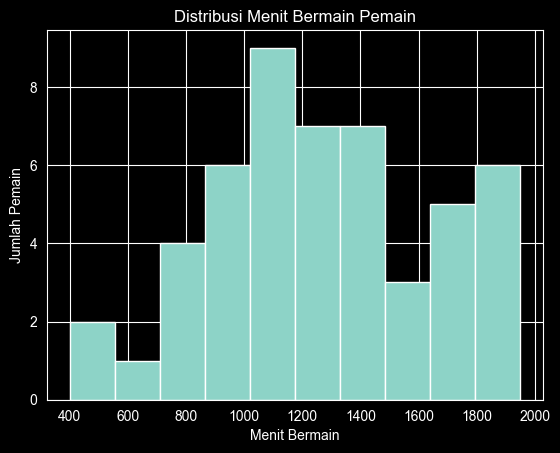

In [16]:
# Histogram
plt.figure()
plt.hist(df["minutes"], bins=10)
plt.xlabel("Menit Bermain")
plt.ylabel("Jumlah Pemain")
plt.title("Distribusi Menit Bermain Pemain")
plt.show()

“Sebagian besar pemain memiliki menit bermain di bawah 1500 menit, menunjukkan hanya sedikit pemain yang menjadi starter reguler.”

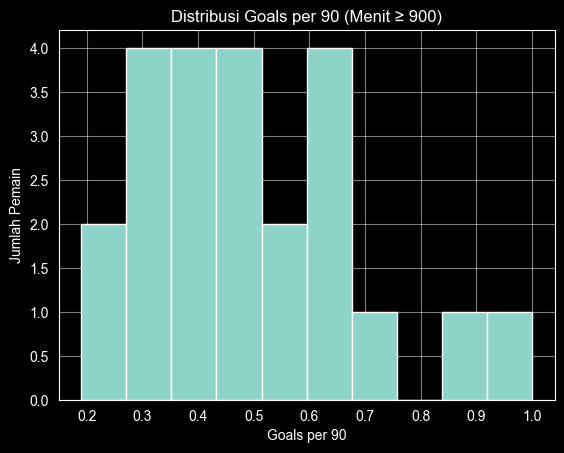

In [17]:
# Histogram G/90
plt.figure()
plt.hist(df_filtered["goals_per_90"], bins=10)
plt.xlabel("Goals per 90")
plt.ylabel("Jumlah Pemain")
plt.title("Distribusi Goals per 90 (Menit ≥ 900)")
plt.grid(alpha=0.5)
plt.show()

"Bisa dilihat dari grafik histogram diatas G/90 tidak merata, hanya ada beberapa pemain yang mendapat G/90 diatas 0.7."

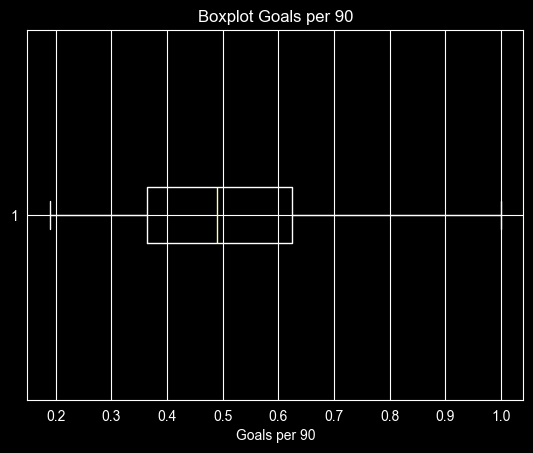

In [18]:
# Boxplot
plt.figure()
plt.boxplot(df_filtered["goals_per_90"], vert=False)
plt.xlabel("Goals per 90")
plt.title("Boxplot Goals per 90")
plt.show()


“Terdapat beberapa outlier dengan goals/90 tinggi, yang menunjukkan pemain dengan efisiensi mencetak gol jauh di atas rata-rata.”

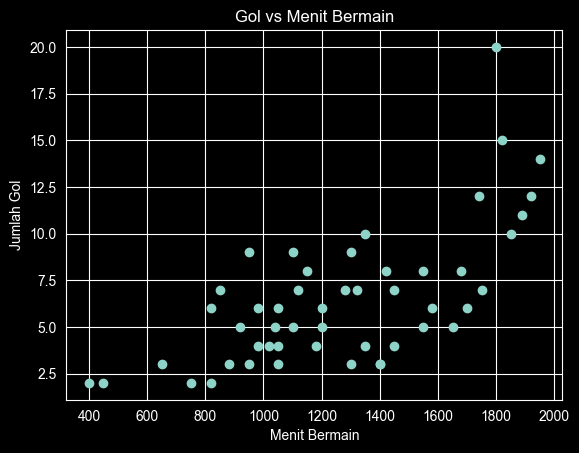

In [19]:
#Scatter Plot
plt.figure()
plt.scatter(df["minutes"], df["goals"])
plt.xlabel("Menit Bermain")
plt.ylabel("Jumlah Gol")
plt.title("Gol vs Menit Bermain")
plt.show()


“Terlihat korelasi positif antara menit bermain dan jumlah gol, namun terdapat beberapa pemain dengan gol tinggi meskipun menit bermain relatif rendah.”

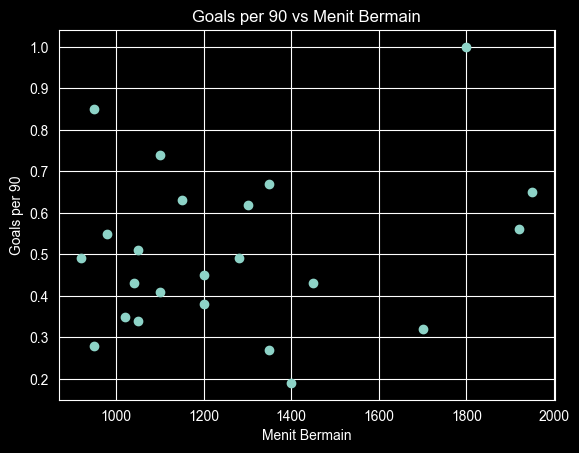

In [20]:
#Scatter Plot G/90
plt.figure()
plt.scatter(df_filtered["minutes"], df_filtered["goals_per_90"])
plt.xlabel("Menit Bermain")
plt.ylabel("Goals per 90")
plt.title("Goals per 90 vs Menit Bermain")
plt.show()

“Grafik menunjukkan sebagian besar striker memiliki goals/90 di bawah 0.5. Hal ini menandakan bahwa striker dengan goals/90 di atas 0.7 tergolong langka dan berpotensi bernilai tinggi.”

In [21]:
df_ctx = df_filtered[df_filtered["name"].isin(["Ollie Watkins", "Alexander Isak"])]

df_ctx

,name,team,goals,minutes,position,goals_per_90
1,Ollie Watkins,Aston Villa,14,1950,CF,0.65
4,Alexander Isak,Newcastle,10,1350,CF,0.67


### Limitasi Analisis
Analisis ini hanya menggunakan data gol dan menit bermain, sehingga belum mempertimbangkan kualitas peluang (xG), peran taktis, dan kontribusi non-gol.


## Nama pemain: Ollie Watkins
### Gol: 14
### Menit Bermain: 1950
### Gol per 90 menit: 0.65

# ===============================

## Nama Pemain: Alexsander Isak
### Gol: 10
### Menit Bermain: 1350
### Gol per 90 menit: 0.67

# ===============================

## Efisiensi:
Dari segi efisiensi Isak sedikit lebih unggul jika dibandingkan dari Watkins, bisa dilihat dari G/90 dan menit bermainnya, G/90 Isak lebih unggul 0.02 point dari Watkins dan total menit bermain yang telah Isak mainkan adalah 1350 lebih sedikit dibanding menit bermain Watkins dengan total menit bermain 1950, dari data tersebut dapat disimpulkan bahwa Isak lebih produktif dari Watkins dalam mencetak gol.

## Sustain
Watkins lebih sustain jika dibanding dengan Isak, Watkins memiliki total menit bermain yang lebih banyak dari Isak, itu berati Watkins bisa memberikan kontribusi yang lebih banyak untuk tim dan juga lebih banyak tersedia untuk timnya.

## Trade-off
Isak lebih efisien dalam mencetak gol dari Watkins dengan G/90 yang lebih tinggi, Tapi Watkins bisa memainkan pertandingan lebih banyak dari Isak, walaupun dari segi G/90 watkins kalah jika dibandingkan dengan Isak, Watkins juga masih tergolong striker yang punya efiensi dalam urusan mencetak gol.